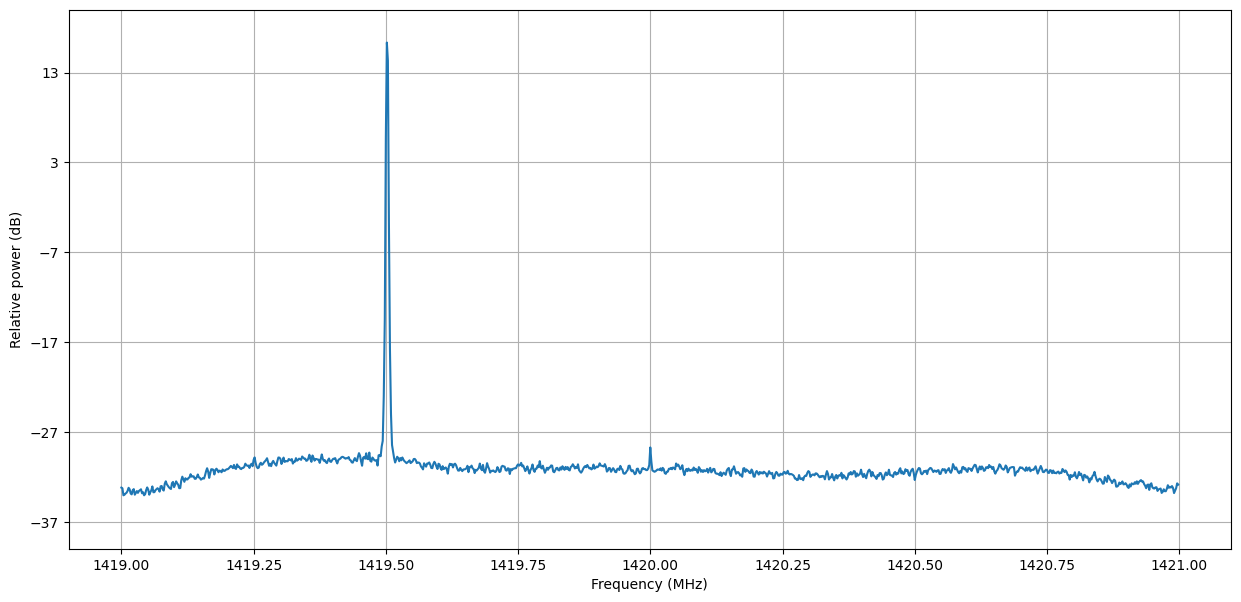

In [1]:
from pylab import *
from rtlsdr import *

# configure device
sdr = RtlSdr()

# configure device
sdr.sample_rate = 2e6

sdr.center_freq = 1420e6
sdr.gain = 4

samples = sdr.read_samples(256*1024)

sample_rate = sdr.sample_rate
center_freq = sdr.center_freq

sdr.close()

plt.figure(figsize=(15, 7))
# use matplotlib to estimate and plot the PSD
psd(samples, NFFT=1024, Fs=sample_rate/1e6, Fc=center_freq/1e6)
ylim(-40, 20)
xlabel('Frequency (MHz)')
ylabel('Relative power (dB)')

show()

Peak Freqs (MHz): [1420.25195313]



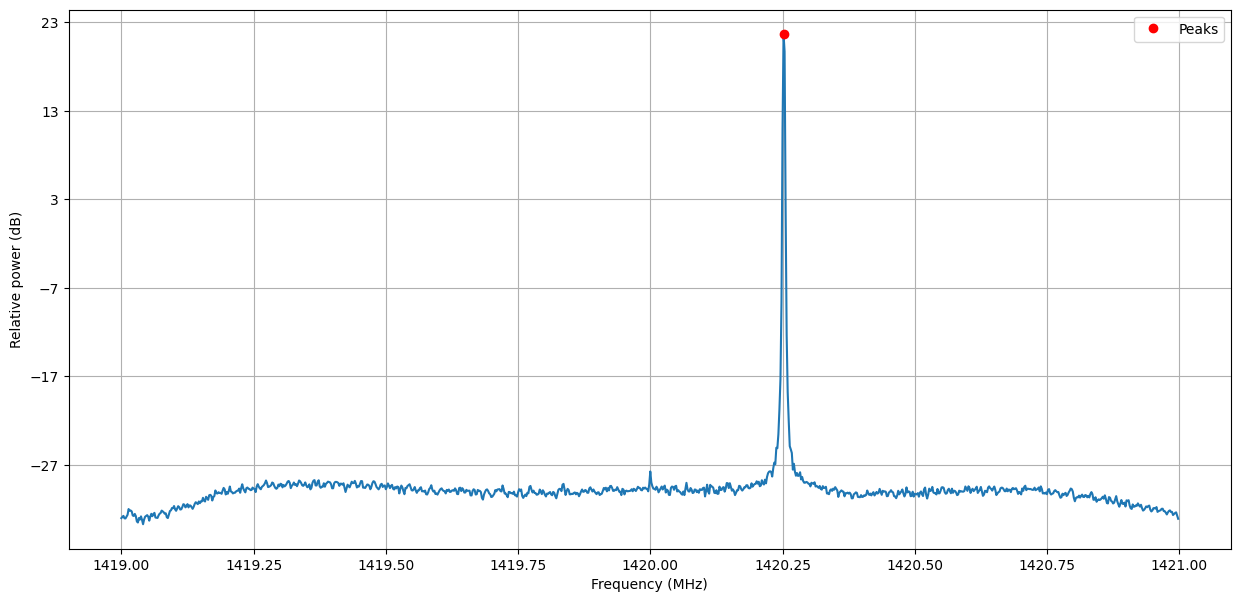

In [25]:
from pylab import *
from rtlsdr import *
from scipy.signal import find_peaks
import numpy as np

# configure device
sdr = RtlSdr()

# configure device
sdr.sample_rate = 2e6

sdr.center_freq = 1420e6
sdr.gain = 10

samples = sdr.read_samples(256*1024)

sample_rate = sdr.sample_rate
center_freq = sdr.center_freq

sdr.close()

plt.figure(figsize=(15, 7))
# use matplotlib to estimate and plot the PSD
Pxx, freqs = psd(samples, NFFT=1024, Fs=sample_rate/1e6, Fc=center_freq/1e6)
#ylim(-40, 20)
xlabel('Frequency (MHz)')
ylabel('Relative power (dB)')
Pxx_10 = 10*np.log10(Pxx)
peaks, _ = find_peaks(Pxx_10, height=-1)

# Plot peaks on the graph
plot(freqs[peaks], Pxx_10[peaks], 'ro', label='Peaks')

print('Peak Freqs (MHz):', freqs[peaks])
print()
# Plot peaks on the graph
legend()
show()



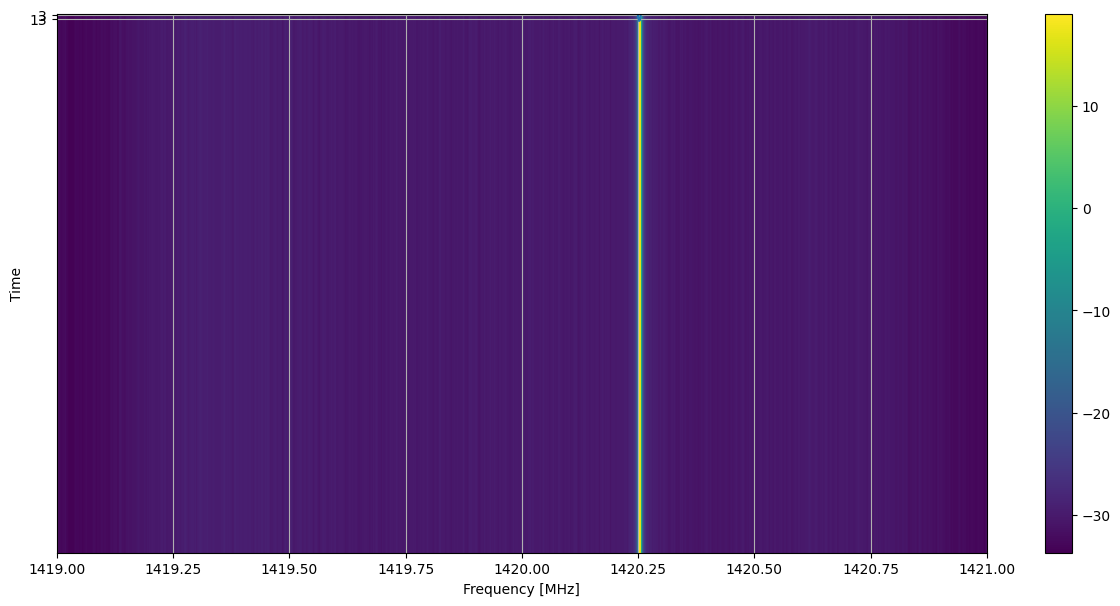

In [41]:
from pylab import *
from rtlsdr import *
from scipy.signal import find_peaks
import numpy as np


plt.figure(figsize=(15, 7))

fft_size = 1024
num_rows = len(Pxx) // fft_size # // is an integer division which rounds down
spectrogram = np.zeros((num_rows, fft_size))
for i in range(num_rows):

    # configure device
    sdr = RtlSdr()
    
    # configure device
    sdr.sample_rate = 2e6
    
    sdr.center_freq = 1420e6
    sdr.gain = 10
    
    samples = sdr.read_samples(256*1024)
    
    sample_rate = sdr.sample_rate
    center_freq = sdr.center_freq
    
    sdr.close()

    Pxx, freqs = psd(samples, NFFT=1024, Fs=sample_rate/1e6, Fc=center_freq/1e6)
    
    spectrogram[i,:] = 10*np.log10(Pxx)

plt.imshow(spectrogram, aspect='auto', extent = [center_freq/1e6 + (sample_rate/-2/1e6), center_freq/1e6 + (sample_rate/2/1e6), center_freq/1e6, len(Pxx)/sample_rate])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time")
plt.colorbar()
plt.show()

